In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Downloads/student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

<AxesSubplot:>

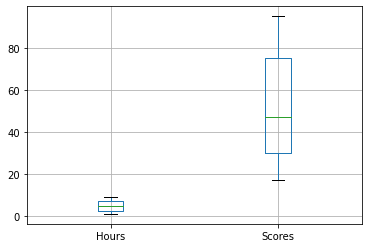

In [12]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

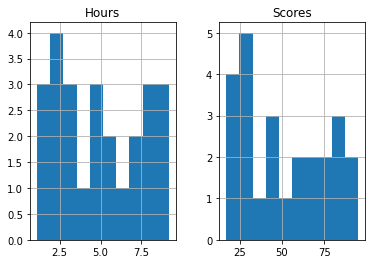

In [13]:
df.hist()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

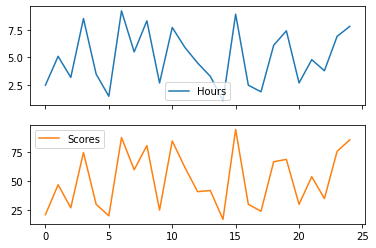

In [14]:
df.plot(subplots = True)

In [38]:
from pandas_profiling import ProfileReport
report=ProfileReport(df)
report.to_file(output_file="Student_score.html")

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

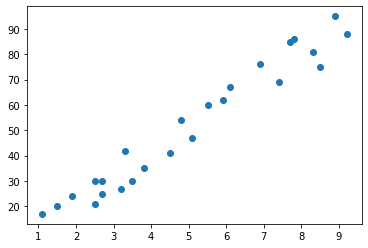

In [15]:
plt.scatter(df["Hours"], df["Scores"])

In [19]:
x = df[["Hours"]]
y = df["Scores"]

In [20]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [21]:
model.coef_

array([9.77580339])

In [22]:
model.intercept_

2.483673405373196

In [24]:
ypred = model.predict(x)

In [25]:
df["Predictions"] = ypred

In [26]:
df

,Hours,Scores,Predictions
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343


In [27]:
model.score(x, y)

0.9529481969048356

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y, ypred)
mae

4.972805319866375

In [30]:
mse = mean_squared_error(y, ypred)
mse

28.88273050924546

In [31]:
rmse = np.sqrt(mse)
mse

28.88273050924546

In [32]:
r2_score(y, ypred)

0.9529481969048356

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [34]:
xtrain.shape

(17, 1)

In [37]:
xtest.shape

(8, 1)

In [39]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [40]:
ypred = model.predict(xtest)

In [41]:
output = pd.DataFrame({"Actual": ytest, "Predicted": ypred})

In [42]:
r2_score(ytest,ypred)

0.8933827573294114

In [43]:
mean_absolute_error(ytest,ypred)

7.169048271425507

In [44]:
np.sqrt(mean_squared_error(ytest,ypred))

7.489481350911204